# **Ejercicios de pair programming Módulo 2**
## **EDA: Lección III**
### **Análisis exploratorio gráfico**

---

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
df_tickets = pd.read_csv("data/historico_tickets_limpio.csv", index_col = 0)
pd.options.display.max_columns = None

In [3]:
df_tickets.head()

,id_ticket,fecha,id_empleado,id_agente,categoría,tipo,severidad,prioridad,días_resolución,satisfacción,semestre,año,mes
0,GDDENR-5042564453,2016-07-13,1735,4,Acceso/Login,Problema,0 - Sin Clasificar,0 - Sin Asignar,0,5,2º semestre,2016,Julio
1,GDDENR-8042508060,2016-05-18,1566,10,Acceso/Login,Problema,0 - Sin Clasificar,0 - Sin Asignar,0,5,1 semestre,2016,Mayo
2,GDDESR-1342539995,2016-06-18,569,29,Sistema,Problema,0 - Sin Clasificar,0 - Sin Asignar,3,5,1 semestre,2016,Junio
3,GDDTSR-5942488006,2016-04-28,320,40,Sistema,Solicitud,0 - Sin Clasificar,0 - Sin Asignar,9,5,1 semestre,2016,Abril
4,GDLEER-0042524120,2016-06-03,1842,31,Software,Problema,2 - Normal,0 - Sin Asignar,0,5,1 semestre,2016,Junio


📌 Nota Como siempre, después de cada gráfica incluid una pequeña explicación de lo que nos está mostrando la gráfica.


1. Estableced el tamaño de las figuras al inicio de vuestro jupyter para que todas tengan las mismas dimensiones.


In [4]:
plt.rcParams["figure.figsize"] = (15,8)

2. Manos a la obra con los plots, estos irán muy dirigidos hacia las preguntas que queremos contestar, para hacer una primera aproximación a nuestras hipótesis:
- En la primera gráfica tendremos que contestar la siguiente pregunta: ¿Son los tickets con mayor severidad y prioridad los que se resuelven antes?. Para eso tendréis que:
    - Crear un subplot con dos gráficas.
    - En la primera gráfica tendréis que mostrar la relación que existe entre la severidad y el tiempo de resolución. ¿Son los tickets que tienen una severidad más alta los que más tardan en resolverse?
    - En la segunda gráfica tendréis que mostrar la relación que existe entre la prioridad y el tiempo de resolución. ¿Son los tickets que tienen una prioridad más alta los que más tardan en resolverse?


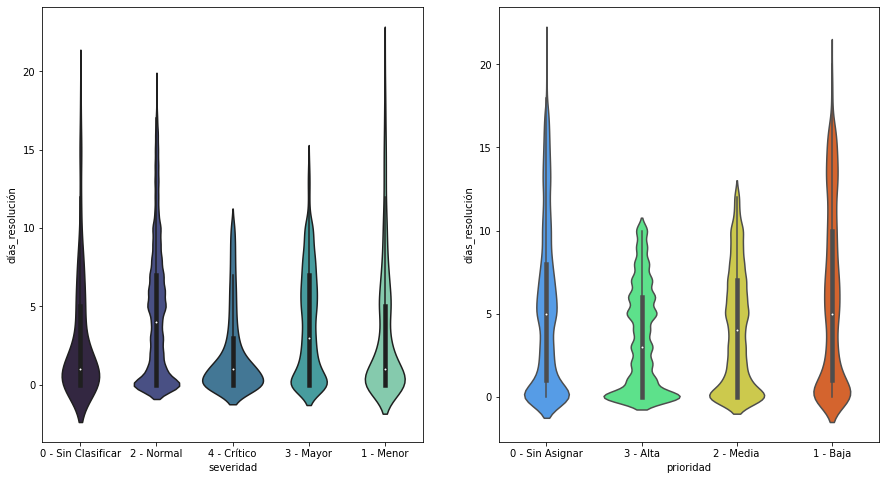

In [5]:
fig, axes = plt.subplots(1, 2)

sns.violinplot(x= "severidad", y= "días_resolución", data = df_tickets , ax = axes[0], palette = "mako")
sns.violinplot(x= "prioridad", y= "días_resolución", data = df_tickets , ax = axes[1], palette = "turbo")      


plt.show();

1. De acuedo con la primera gráfica los tickes con mayor severidad, o sea, los de severidad "crítico" (4), son los que se solucionan en menos días. También los que están "sin clasificar" (0), y los de severidad "menor" (1) suelen ser solucionados en pocos días, aunque en estos casos, tenemos outliers por encima alargando nuestras gráficas. Que los dos extremos de severidad sean los que menos tiempo tarden, sugiere que las incidencias mas sencillas se solucionan pronto y que a las críticas, se les da mayor urgencia.
2. Los tickes que tienen prioridad alta son los que se solucionan en menos días. Vemos que las incidencias que están en categoría "Sin Asignar" (0) se solucionan en aproximadamente los mismos días que los de prioridad "baja" (1). El sistema de asignación de prioridades funciona correctamente ya que el índice de prioridad es inversamente proporcional a los días de resolución. Es decir, cuanto mas crece la prioridad, menor es el tiempo de resolución. 


- En la segunda gráfica contestaremos a la siguiente pregunta: ¿Están los clientes con problemas de acceso y login más contentos que los que tienen problemas de software?. Para eso tendréis que:
    - Crear otro dataframe donde tengáis solo los datos para los datos para los problemas de tipo "Acceso/Login" o "Software".
    - Crear una gráfica donde podamos ver la satisfacción de los clientes en función de los problemas filtrados en el paso anterior.


In [6]:
df_categoria = df_tickets[(df_tickets['categoría']== 'Acceso/Login') | (df_tickets['categoría']== 'Software')]
df_categoria

,id_ticket,fecha,id_empleado,id_agente,categoría,tipo,severidad,prioridad,días_resolución,satisfacción,semestre,año,mes
0,GDDENR-5042564453,2016-07-13,1735,4,Acceso/Login,Problema,0 - Sin Clasificar,0 - Sin Asignar,0,5,2º semestre,2016,Julio
1,GDDENR-8042508060,2016-05-18,1566,10,Acceso/Login,Problema,0 - Sin Clasificar,0 - Sin Asignar,0,5,1 semestre,2016,Mayo
4,GDLEER-0042524120,2016-06-03,1842,31,Software,Problema,2 - Normal,0 - Sin Asignar,0,5,1 semestre,2016,Junio
5,GDLEER-0142608095,2016-08-26,59,20,Software,Problema,2 - Normal,0 - Sin Asignar,1,1,2º semestre,2016,Agosto
6,GDLEER-0242564650,2016-07-13,1175,36,Software,Problema,2 - Normal,0 - Sin Asignar,2,1,2º semestre,2016,Julio
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29067,TWRTNR-3143942621,2020-04-21,1142,6,Acceso/Login,Solicitud,3 - Mayor,1 - Baja,1,4,1 semestre,2020,Abril
29068,TWRTNR-4043879718,2020-02-18,621,17,Acceso/Login,Solicitud,1 - Menor,1 - Baja,0,4,1 semestre,2020,Febrero
29069,TWRTNR-4043958035,2020-05-07,3,30,Acceso/Login,Solicitud,1 - Menor,1 - Baja,0,4,1 semestre,2020,Mayo
29070,TWRTNR-8143882402,2020-02-21,360,4,Acceso/Login,Solicitud,3 - Mayor,1 - Baja,1,5,1 semestre,2020,Febrero


<AxesSubplot:xlabel='satisfacción', ylabel='count'>

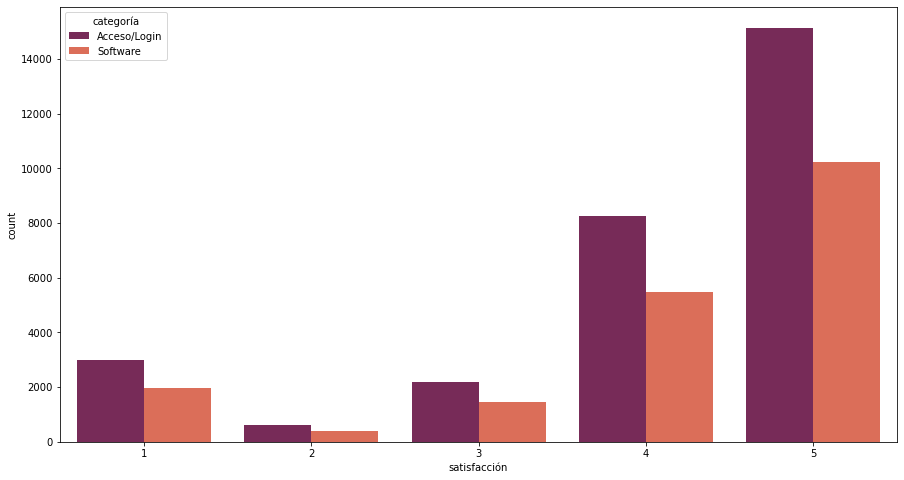

In [7]:
sns.countplot(x='satisfacción', data=df_categoria, hue= 'categoría', palette = "rocket")

1. La mayoria de los clientes en las dos categorías ("Acceso/Login" y "Software) están satisfechos con la atención recibida, valorándola entre 4 y 5. 
2. No vemos marcadas diferencias entre las categorías a la hora de estimar la satisfacción. 

- En la tercera gráfica contestaremos a las siguientes preguntas ¿Cuáles son los empleados que más tickets atienden? ¿Son los empleados que atienden más tickets los que tardan más en solucionar los problemas de los clientes? ¿Y la media de la satisfacción de los clientes es menor en aquellos empleados que atienden más solicitudes?. Para contestar a esto haremos 3 gráficas independientes:

     - En la primera gráfica deberemos, ¿Cuáles son los empleados que más tickets atienden?:
         - Sacar el número de tickets por empleado. Pista 💡 Para esto tendremos que usar un groupby.
         - Visualizar el resultado del groupby anterior con la gráfica que sea más adecuada.


In [8]:
df_empleados=df_tickets.groupby("id_empleado")[["id_ticket"]].count().reset_index()



In [9]:
type(df_empleados)

pandas.core.frame.DataFrame

In [10]:
df_empleados= df_empleados.sort_values(by= 'id_ticket', ascending=False)

df_empleados



,id_empleado,id_ticket
753,754,73
284,285,73
635,636,71
522,523,69
78,79,69
...,...,...
1617,1618,31
71,72,31
1194,1195,29
98,99,27


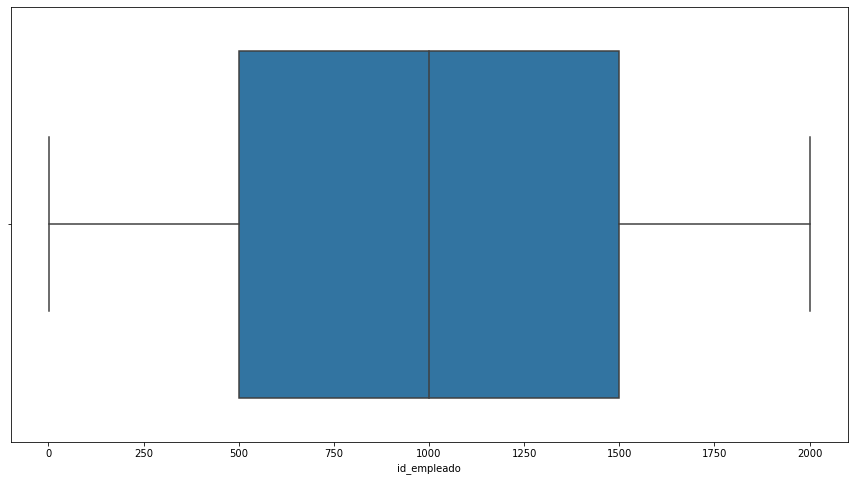

In [11]:
# preguntarle a Cesar en la tutoría

sns.boxplot(x= "id_empleado", data = df_empleados)

plt.show();


- En la segunda gráfica, ¿Son los empleados que atienden más tickets los que tardan más en solucionar los problemas de los clientes?
    - Deberéis crear una lista donde tengamos los "id's" de los 10 empleados que resuelvan más cantidad tickets y con los 10 empleados que resuelvan menos cantidad de tickets.
    - Usando la lista generada en el ejercicio anterior filtrad el dataframe para quedaros solo con los 10 seleccionados en el ejercicio anterior.
    - Una vez tengáis el dataframe filtrado, cread una gráfica donde veamos el tiempo de resolución de solicitudes para cada empleado.


In [19]:
df10_primeros = df_empleados.iloc[0:10]
lista_10_primeros = list(df10_primeros["id_empleado"].values)
lista_10_primeros

[754, 285, 636, 523, 79, 1341, 442, 326, 482, 1448]

In [22]:
df10_ultimos = df_empleados.iloc[-10:]
lista_10_ultimos = list(df10_ultimos["id_empleado"].values)
lista_10_ultimos

[1041, 1792, 607, 686, 1384, 1618, 72, 1195, 99, 793]


        
- En la tercera gráfica, ¿Y la media de la satisfacción de los clientes es menor en aquellos empleados que atienden más solicitudes?:
📌 Usaremos los mismos datos que en la pregunta anterior, el dataframe de los 10 empleados más productivos y menos productivos.
  - Cread una gráfica donde veamos la satisfacción de los clientes para cada empleado.